# Exploratory Data Analysis - CARMA Data

This loads the class `DataHandler` which is a class that should be able to process data comming either from `PoC` or `CARMA`

In [1]:
from collector.handler import DataHandler

In particular we consider one of the `CARMA` datasets

In [2]:
# csv path 
csvpath = 'data/raw/carma/data5.csv'
experiment = DataHandler(csvpath)

After passing the path towards the file we execute the method `compute_response_times` which is responsible for loading, cleaning, and computing the corresponding times 

In [3]:
experiment.compute_response_times()

Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data5


In [4]:
experiment._transitiontimes

,vehid,value
0,0,181.9
1,0,318.8
14,1,394.5
27,2,184.4
28,2,215.9
29,2,237.5
30,2,318.9
31,2,368.9
44,3,187.0
45,3,394.5


In [5]:
# Time between vehicle i-1 and vehicle i
experiment._compute_leader_follower_times()

,1,2,3,4
0,0.0,NaN,NaN,NaN
1,NaN,2.5,NaN,NaN
2,NaN,NaN,2.6,NaN
3,NaN,NaN,NaN,2.0


In [6]:
# Time between vehicle 1 and vehicle i
experiment._compute_head_follower_times()

,1,2,3,4
0,0.0,NaN,NaN,NaN
1,NaN,2.5,NaN,NaN
2,NaN,NaN,5.1,NaN
3,NaN,NaN,NaN,7.1


## Explore the whole amount of files 

In this case we are going to process all data from `CARMA`

In [7]:
from glob import glob

filenames = glob('data/raw/carma/*.csv')
filenames

['data/raw/carma/data5.csv',
 'data/raw/carma/data6.csv',
 'data/raw/carma/data9.csv',
 'data/raw/carma/data12.csv',
 'data/raw/carma/data13.csv',
 'data/raw/carma/data10.csv']

In [8]:
experiments = [DataHandler(file) for file in filenames]

We can now compute the transition times, detection of response times in each vehicle

In [9]:
[e.compute_response_times() for e in experiments];

Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data5
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data6
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data9
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data12
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data13
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data10


Let's compute the leader follower response times 

In [10]:
import pandas as pd

rtlf= [lf._compute_leader_follower_times() for lf in experiments]
rtlf = pd.concat(rtlf)

This represents the response time between the leader `i-1` and the follower `i`

In [11]:
rtlf.head()

,1,2,3,4
0,0.0,NaN,NaN,NaN
1,NaN,2.5,NaN,NaN
2,NaN,NaN,2.6,NaN
3,NaN,NaN,NaN,2.0
0,0.0,NaN,NaN,NaN


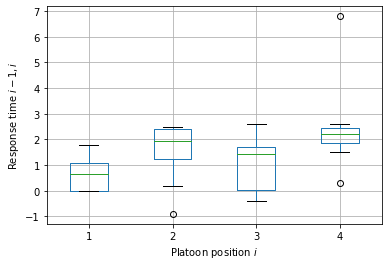

In [12]:
a = rtlf.boxplot();
a.set_xlabel('Platoon position $i$');
a.set_ylabel('Response time $i-1,i$');

In [13]:
rt0f= [lf._compute_head_follower_times() for lf in experiments]
rt0f = pd.concat(rt0f)

This represents the time between vehicle `0` and vehicle `i`

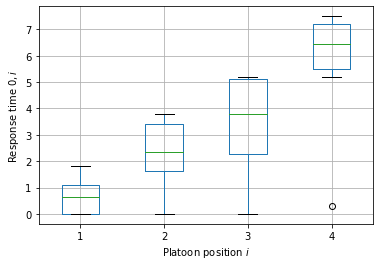

In [14]:
a = rt0f.boxplot();
a.set_xlabel('Platoon position $i$');
a.set_ylabel('Response time $0,i$');

A. Ladino